In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from preprocess import get_results, mean_aggregate_results

flat_map = lambda f, xs: reduce(lambda a, b: a + b, map(f, xs), [])

In [2]:
ts = []
es = []
ls = []

for i in range(16, 17):
	t, e, l = get_results(f'../results_final_{i}')
	ts.append(t)
	es.append(e)
	ls.append(l)

In [3]:
ls[0][ls[0].framework == 'TensorFlow']

,framework,model_name,epoch,elapsed_time
64,TensorFlow,FullyConnectedNet,0,61.943671
65,TensorFlow,FullyConnectedNet,1,5.558312
66,TensorFlow,FullyConnectedNet,2,5.219026
67,TensorFlow,FullyConnectedNet,3,4.038751
68,TensorFlow,FullyConnectedNet,4,3.084141
...,...,...,...,...
123,TensorFlow,SODNet,4,14.396655
124,TensorFlow,SODNet,5,14.309148
125,TensorFlow,SODNet,6,14.615653
126,TensorFlow,SODNet,7,14.487284


In [4]:
def draw_consistency_comparison(framework, ts, es, ls ):
	ts = list(map(lambda df: df[df.framework == framework], ts))
	es = list(map(lambda df: df[df.framework == framework], es))
	ls = list(map(lambda df: df[df.framework == framework], ls))

	models = flat_map(lambda m: [m] * 3, ts[0].model_name.unique())
	n_models = len(models) // 3
	
	fig, axes = plt.subplots(n_models, 3, constrained_layout=True)
	fig.set_size_inches(9, 2 * n_models)
	fig.suptitle(f'{framework} results consistency comparison')

	colors = []
	for idx, (model, ax) in enumerate(zip(models, axes.flatten())):
		if idx % 3 == 0:
			for t in ts:
				data = t[t.model_name == model]
				ax.plot(data.epoch, data.elapsed_time)
			colors = [l.get_color() for l in ax.lines]
		
		elif idx % 3 == 1:
			data = pd.concat(es)
			data = data[data.model_name == model]
			xs = range(data.shape[0])
			ax.bar(xs, data.elapsed_time, color=colors)

		else:
			for l in ls:
				data = l[l.model_name == model]
				ax.plot(data.epoch, data.elapsed_time)

		ax.set_title(model)

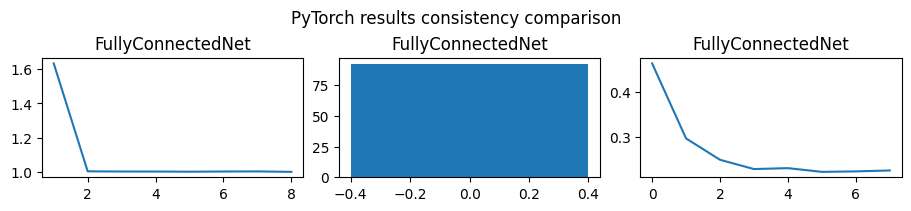

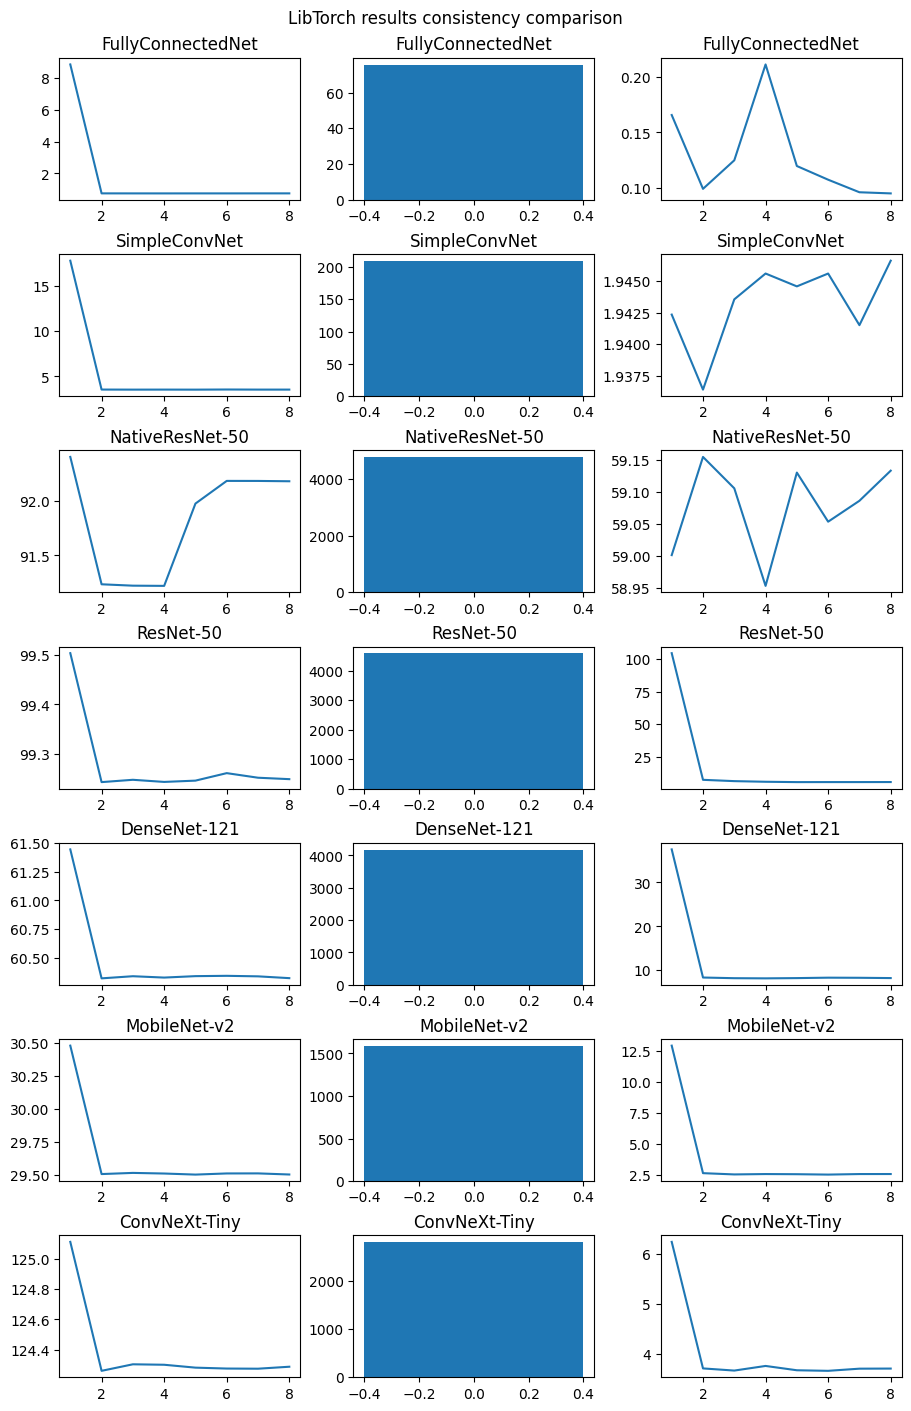

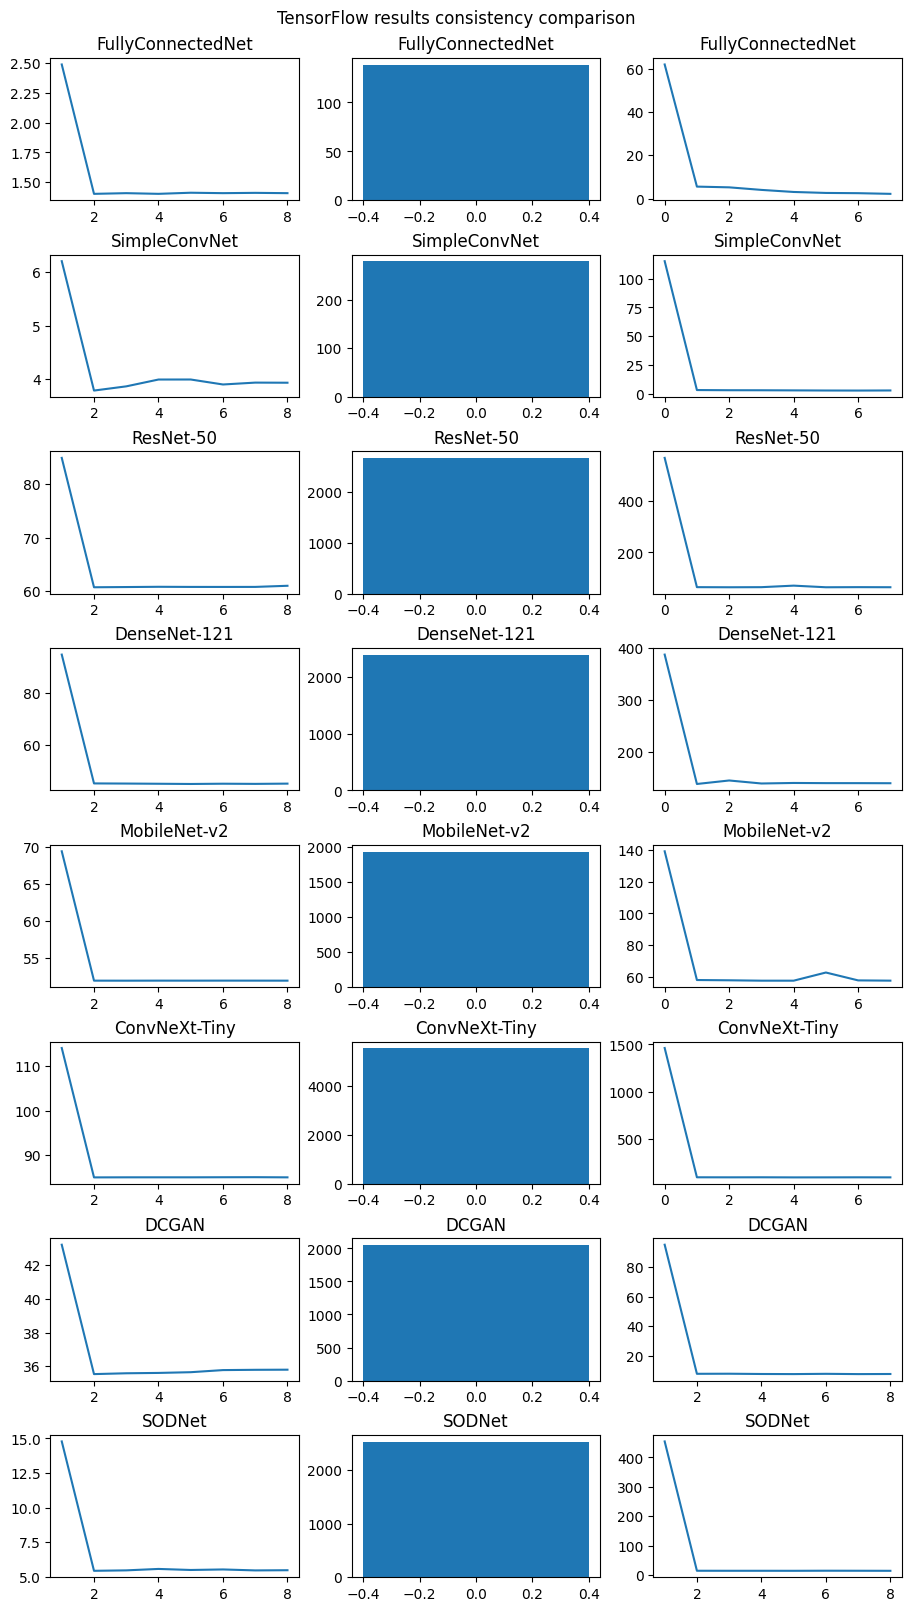

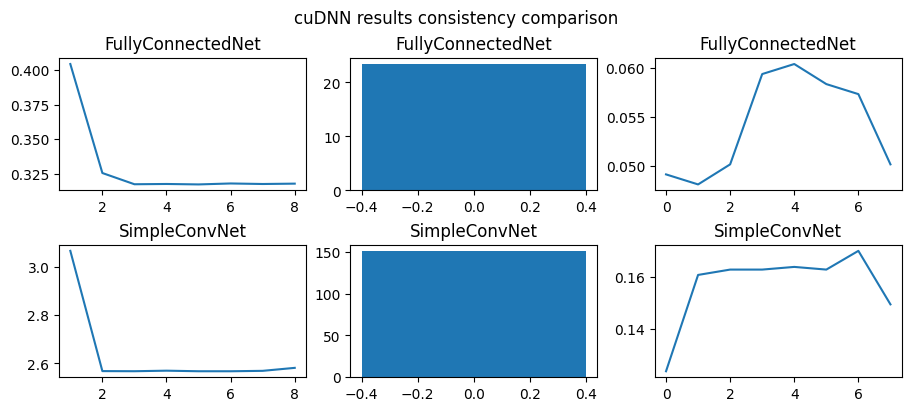

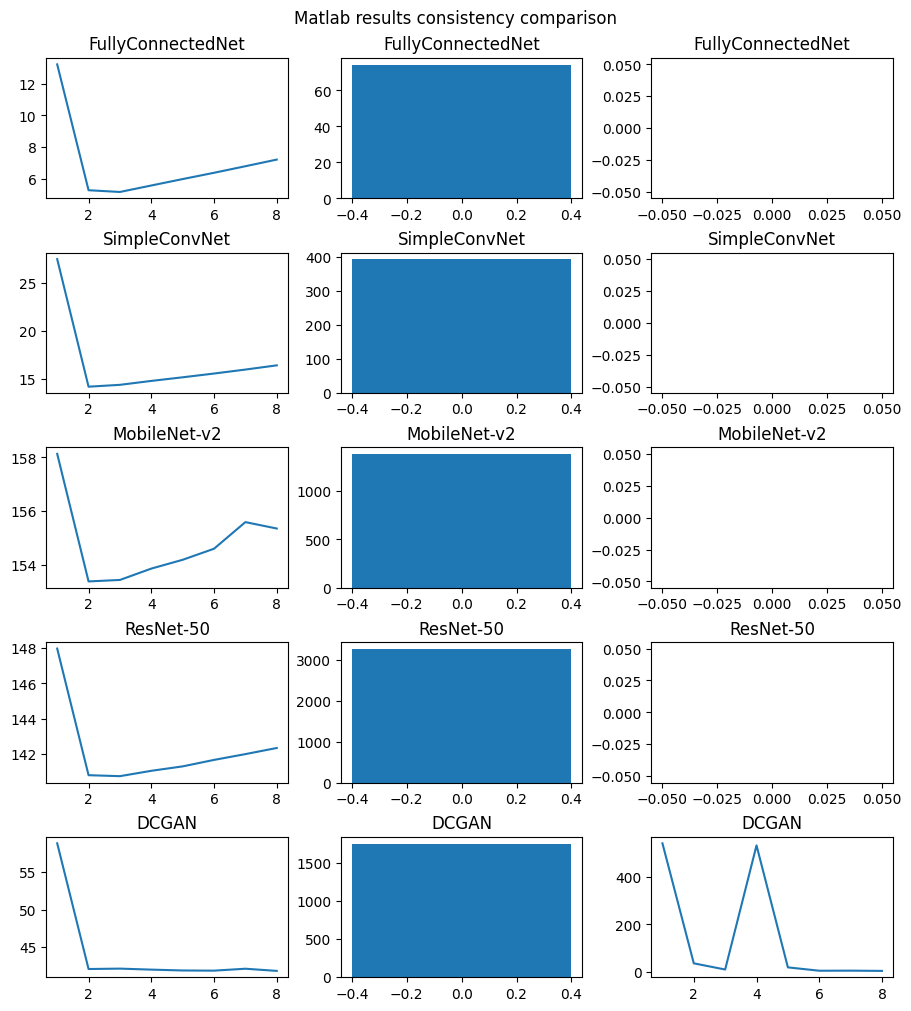

In [5]:
frameworks = ts[0].framework.unique()
for framework in frameworks:
	draw_consistency_comparison(framework, ts, es, ls)

All benchmarks have near perfect consistency, thus there is no meaningful use in result aggregation. BUT I still do it for the CRAFT

In [6]:
tm, em = mean_aggregate_results(ts, es)

tm.head(10)

,framework,model_name,epoch,elapsed_time
0,PyTorch,FullyConnectedNet,1,1.632838
1,PyTorch,FullyConnectedNet,2,1.004397
2,PyTorch,FullyConnectedNet,3,1.003343
3,PyTorch,FullyConnectedNet,4,1.003222
4,PyTorch,FullyConnectedNet,5,1.002272
5,PyTorch,FullyConnectedNet,6,1.003345
6,PyTorch,FullyConnectedNet,7,1.003929
7,PyTorch,FullyConnectedNet,8,1.001317
8,LibTorch,FullyConnectedNet,1,8.861270
9,LibTorch,FullyConnectedNet,2,0.746016
